# Data Visualization

In [30]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

sys.path.append("../../")

In [31]:
# path to the data
data_path = os.path.join(os.getcwd(), "../data_storage")
# Import the dataset water, electricity and gas
water = pd.read_csv(os.path.join(data_path, "resampled_data_D_water.csv"))
power = pd.read_csv(os.path.join(data_path, "resampled_data_D_power.csv"))
gas = pd.read_csv(os.path.join(data_path, "resampled_data_D_gas.csv"))
gas_color = sns.color_palette(palette="husl", n_colors=8)[0]
power_color = sns.color_palette("husl", 8)[1]
water_color = sns.color_palette("husl", 8)[2]

In [32]:
water

,date,id_meter,water_m3,calc_cons
0,2014-09-04,2.0,114.418000,NaN
1,2014-09-05,2.0,114.742894,0.324894
2,2014-09-06,2.0,115.067788,0.324894
3,2014-09-07,2.0,115.392682,0.324894
4,2014-09-08,2.0,115.717576,0.324894
...,...,...,...,...
4763,2014-09-28,6.0,334.125000,0.218750
4764,2014-09-29,6.0,334.343750,0.218750
4765,2014-09-30,6.0,334.562500,0.218750
4766,2014-10-01,6.0,334.781250,0.218750


In [33]:
power
# gas
# water

,date,id_meter,power_kwh,calc_cons
0,2014-09-04,4.0,51419.300000,NaN
1,2014-09-05,4.0,51422.141748,2.841748
2,2014-09-06,4.0,51424.983495,2.841748
3,2014-09-07,4.0,51427.825243,2.841748
4,2014-09-08,4.0,51430.666990,2.841748
...,...,...,...,...
4747,2014-09-28,7.0,2227.783913,1.104022
4748,2014-09-29,7.0,2228.887935,1.104022
4749,2014-09-30,7.0,2229.991957,1.104022
4750,2014-10-01,7.0,2231.095978,1.104022


## Process the data to prepare for visualization

In [34]:
# Function to process the data
def process_data(data):
    # copy the dataset
    data_proc = data.copy()
    # Convert the date column to a datetime object
    data_proc["date"] = pd.to_datetime(data_proc["date"])
    # Sort the data by date
    data_proc = data_proc.sort_values("date")
    # drop the duplicates rows
    data_proc = data_proc.drop_duplicates(subset="date")
    # # Drop the columns that are not needed
    # data_proc = data_proc.drop(columns=["days", "diff_cons", "days_month", "days_cons"])
    # # Convert the data to a numpy array
    # data = data.to_numpy()
    # Return the data
    return data_proc


# Process the data
water = process_data(water)
power = process_data(power)
gas = process_data(gas)

In [38]:
water

,date,id_meter,water_m3,calc_cons
3548,2011-06-01,6.0,1.000000,NaN
3549,2011-06-02,6.0,1.219512,0.219512
3550,2011-06-03,6.0,1.439024,0.219512
3551,2011-06-04,6.0,1.658537,0.219512
3552,2011-06-05,6.0,1.878049,0.219512
...,...,...,...,...
3543,2024-05-28,3.0,419.709387,0.227903
3544,2024-05-29,3.0,419.937290,0.227903
3545,2024-05-30,3.0,420.165194,0.227903
3546,2024-05-31,3.0,420.393097,0.227903


## General functions

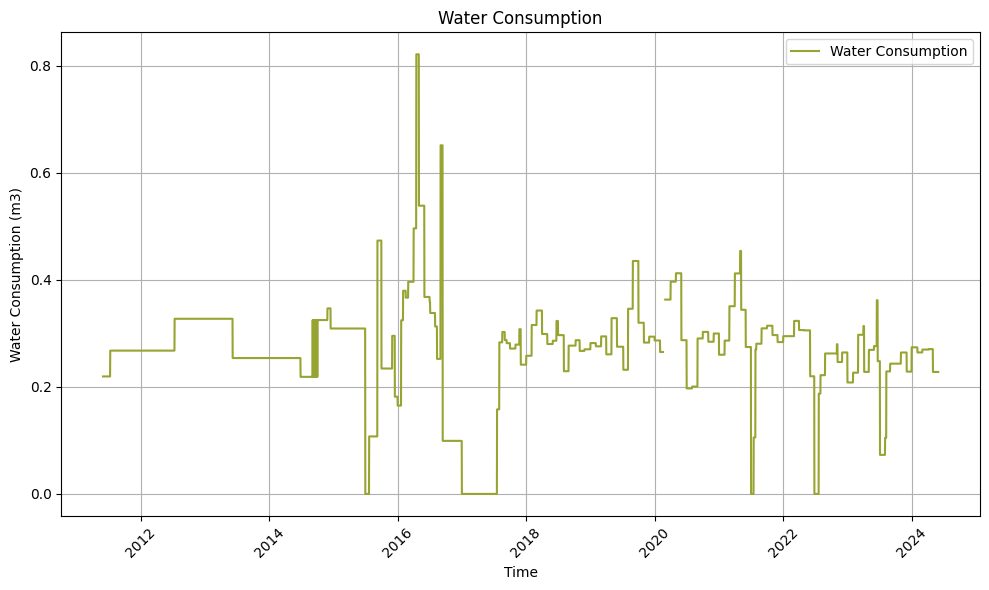

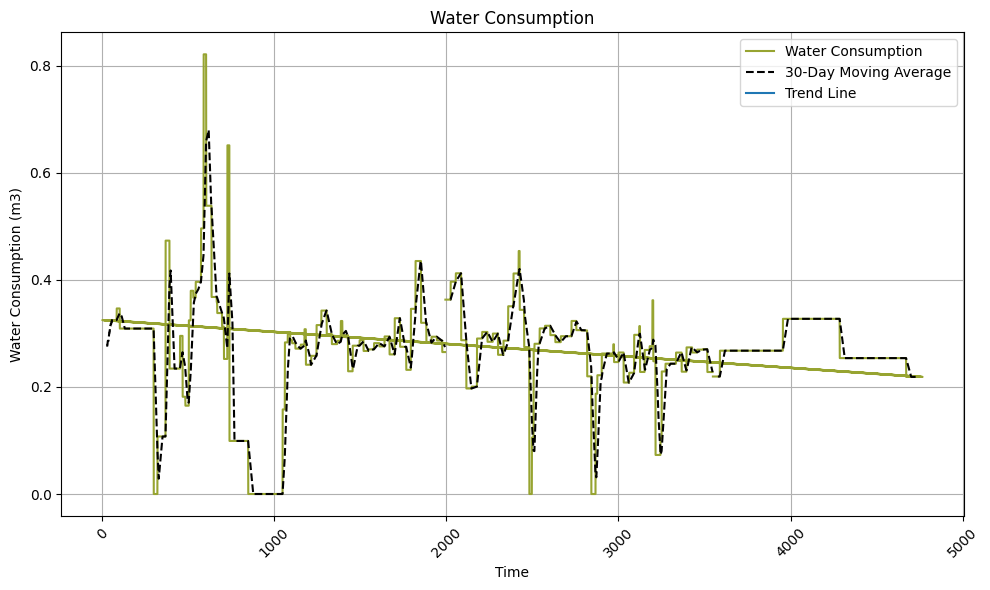

In [64]:
# Function to plot the data by date, meter and consumption
def plot_date_meter_consumption(data, title, ylabel, xlabel, color) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(data["date"], data["calc_cons"], color=color)
    plt.grid()
    plt.legend([title])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

plot_date_meter_consumption(water, "Water Consumption", "Water Consumption (m3)", "Time", water_color)

# Function to plot the data by column
def plot_data_column(data, title, ylabel, xlabel, color) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(data, color=color)
    plt.grid()
    # moving average
    plt.plot(data.rolling(window=30).mean(), color="black", linestyle="--")
    # trend line
    plt.plot(data.index, np.poly1d(np.polyfit(data.index, data, 1))(data.index))
    plt.legend([title, "30-Day Moving Average", "Trend Line"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()



# Plot the data
plot_data_column(
    water["calc_cons"],
    "Water Consumption",
    "Water Consumption (m3)",
    "Time",
    water_color,
)
# plot_data(
#     power["calc_cons"], "Power Consumption", "Power Consumption (kWh)", "Time", power_color
# )
# plot_data(gas["calc_cons"], "Gas Consumption", "Gas Consumption (m3)", "Time", gas_color)


In [27]:
# function to group by day, week, month, quarter, season and year the data
def group_data(data) -> tuple:
    # Convert the date column to a datetime object
    data["date"] = pd.to_datetime(data["date"])
    # Group the data by day
    data_day = data.resample("D", on="date").sum()
    # Group the data by week
    data_week = data.resample("W", on="date").sum()
    # Group the data by month
    data_month = data.resample("M", on="date").sum()
    # Group the data by quarter
    data_quarter = data.resample("Q", on="date").sum()
    # Group the data by season
    data_season = data.resample("Q-FEB", on="date").sum()
    # Group the data by year
    data_year = data.resample("Y", on="date").sum()
    # Convert the date column to a datetime object
    data_day["date"] = data_day.index
    data_week["date"] = data_week.index
    data_month["date"] = data_month.index
    data_quarter["date"] = data_quarter.index
    data_season["date"] = data_season.index
    data_year["date"] = data_year.index
    # Return the data
    return data_day, data_week, data_month, data_quarter, data_season, data_year


# Group the data
water_day, water_week, water_month, water_quarter, water_season, water_year = (
    group_data(water)
)
power_day, power_week, power_month, power_quarter, power_season, power_year = (
    group_data(power)
)
gas_day, gas_week, gas_month, gas_quarter, gas_season, gas_year = group_data(gas)

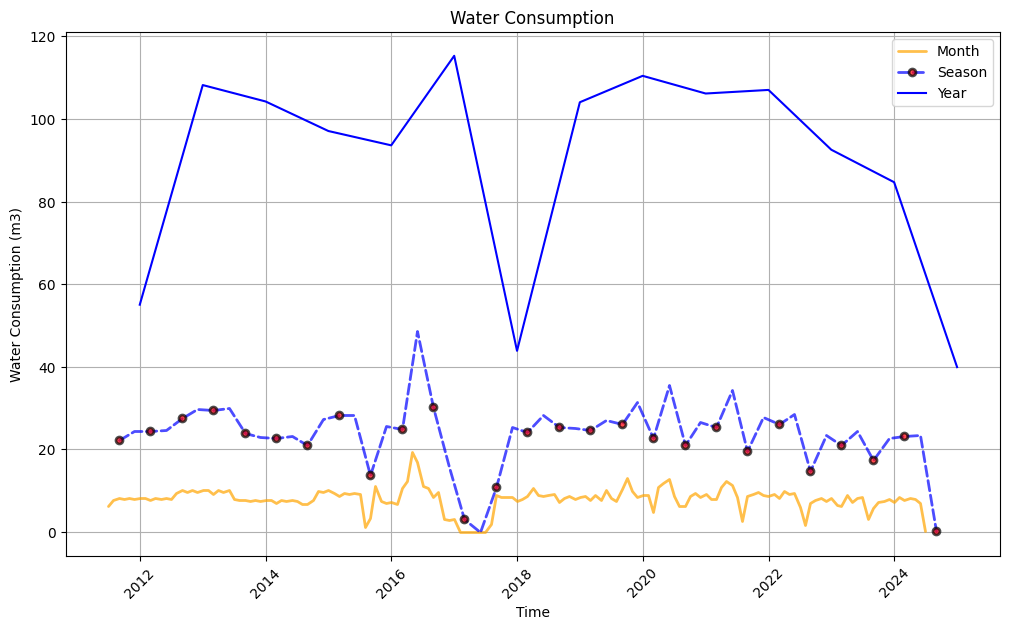

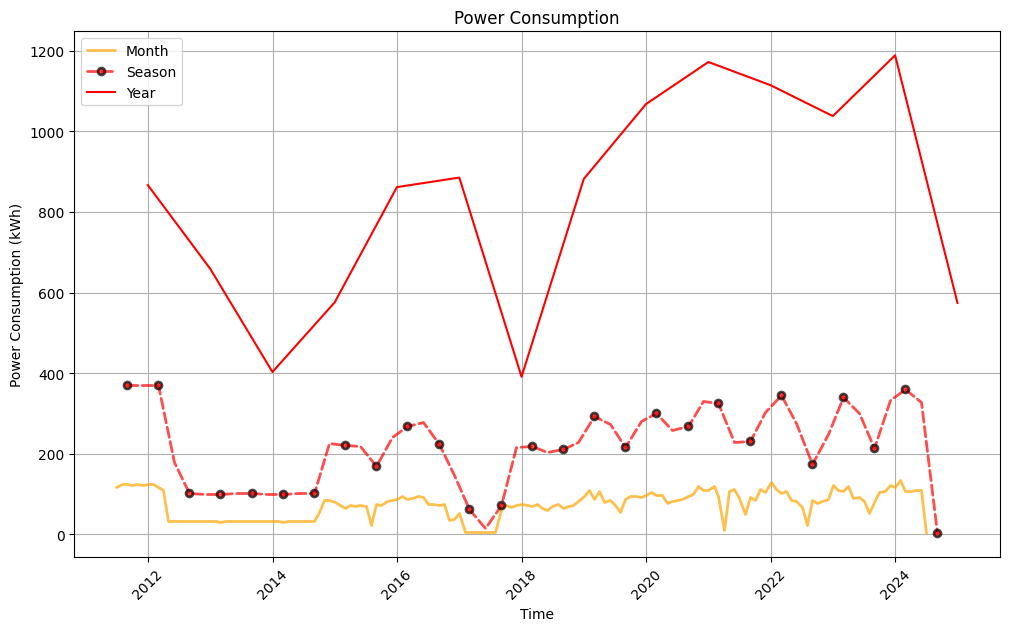

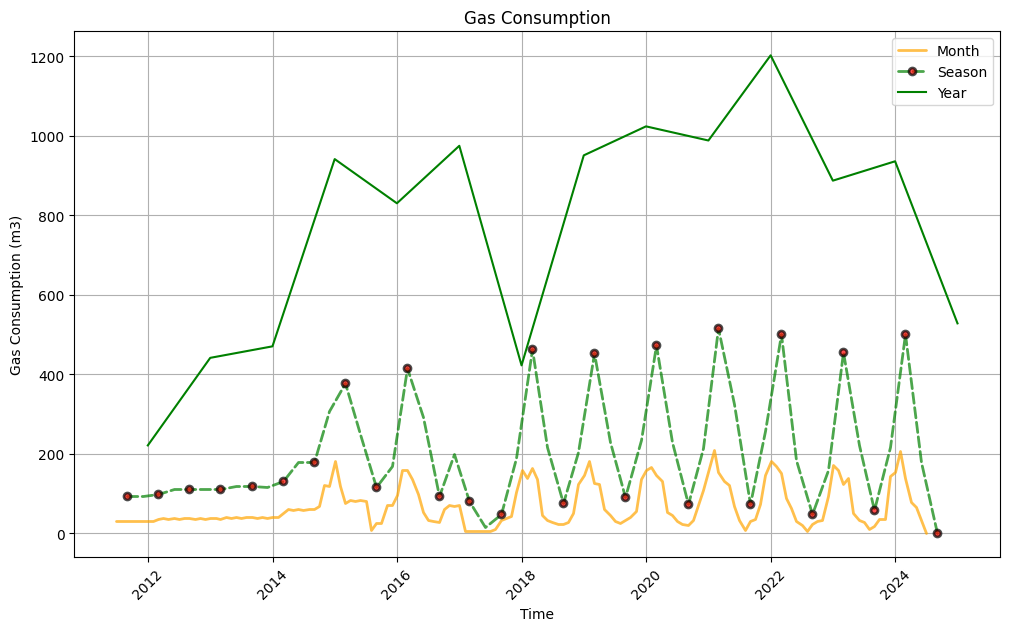

In [28]:
# Function to plot the data grouped by day, week, month, quarter, season and year
def plot_grouped_data(
    data_day: pd.DataFrame,
    data_week: pd.DataFrame,
    data_month: pd.DataFrame,
    data_quarter: pd.DataFrame,
    data_season: pd.DataFrame,
    data_year: pd.DataFrame,
    title: str,
    ylabel: str,
    xlabel: str,
    color: str,
) -> None:
    plt.figure(figsize=(10, 6))
    # plt.plot(data_day, color=color, label="Day")
    # plt.plot(data_week, color=color, label="Week")
    plt.plot(
        data_month,
        color="orange",
        label="Month",
        # marker="o",
        # markersize=5,
        # linestyle="--",
        linewidth=2,
        alpha=0.7,
        markerfacecolor="red",
        markeredgewidth=2,
        markeredgecolor="black",
        markevery=2,
        zorder=2,
        clip_on=True,
        solid_capstyle="round",
        dash_capstyle="round",
        dash_joinstyle="round",
        solid_joinstyle="round",
        antialiased=True,
        pickradius=5,
        snap=True,
        rasterized=True,
        path_effects=None,
        sketch_params=None,
    )
    # plt.plot(data_quarter, color=color, label="Quarter")
    # plot data by season showing winter, spring, summer and autumn with different colors
    plt.plot(
        data_season,
        color=color,
        label="Season",
        marker="o",
        markersize=5,
        linestyle="--",
        linewidth=2,
        alpha=0.7,
        markerfacecolor="red",
        markeredgewidth=2,
        markeredgecolor="black",
        markevery=2,
        zorder=2,
        clip_on=True,
        solid_capstyle="round",
        dash_capstyle="round",
        dash_joinstyle="round",
        solid_joinstyle="round",
        antialiased=True,
        pickradius=5,
        snap=True,
        rasterized=True,
        path_effects=None,
        sketch_params=None,
    )
    plt.plot(data_year, color=color, label="Year")
    #    # moving average
    #     plt.plot(data_year.rolling(window=30).mean(), color="black", linestyle="--")
    #     # trend line
    #     plt.plot(data_year.index, np.poly1d(np.polyfit(data_year.index, data_year, 1))(data_year.index))
    # color each season
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="blue",
    #     alpha=0.1,
    #     label="Winter",
    # )
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="green",
    #     alpha=0.1,
    #     label="Spring",
    # )
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="red",
    #     alpha=0.1,
    #     label="Summer",
    # )
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="orange",
    #     alpha=0.1,
    #     label="Autumn",
    # )
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()


# Plot the data
plot_grouped_data(
    water_day["calc_cons"],
    water_week["calc_cons"],
    water_month["calc_cons"],
    water_quarter["calc_cons"],
    water_season["calc_cons"],
    water_year["calc_cons"],
    "Water Consumption",
    "Water Consumption (m3)",
    "Time",
    "blue",
)
plot_grouped_data(
    power_day["calc_cons"],
    power_week["calc_cons"],
    power_month["calc_cons"],
    power_quarter["calc_cons"],
    power_season["calc_cons"],
    power_year["calc_cons"],
    "Power Consumption",
    "Power Consumption (kWh)",
    "Time",
    "red",
)
plot_grouped_data(
    gas_day["calc_cons"],
    gas_week["calc_cons"],
    gas_month["calc_cons"],
    gas_quarter["calc_cons"],
    gas_season["calc_cons"],
    gas_year["calc_cons"],
    "Gas Consumption",
    "Gas Consumption (m3)",
    "Time",
    "green",
)

In [ ]:
# Function to plot min, max and average consumption
def plot_min_max_avg(data, title: str, ylabel: str, xlabel: str, color: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(data["calc_cons"].resample("D", on="date").min(), color=color, label="Min")
    plt.plot(data["calc_cons"].resample("D", on="date").max(), color=color, label="Max")
    plt.plot(
        data["calc_cons"].resample("D", on="date").mean(), color=color, label="Average"
    )
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()


# Plot the data
plot_min_max_avg(water, "Water Consumption", "Water Consumption (m3)", "Time", "blue")